In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# importing data
df = pd.read_csv('data/unique_outages2.csv', parse_dates=['Start', 'Finish'])
df = df.replace({r"\r|\n": " "}, regex=True)
df.columns = df.columns.str.replace(r'[\r\n]', ' ', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()
# df = df.drop(columns=['Status_Description_Market', 'Market_Notice_Code', 'Impact_Region'])

df = df[(df['Duration_Hours'] != 0) & (df['Region'] != 'VIC/ TAS') & (df['Unplanned?'] != 1)]
df = df.dropna()
df.head(5)

,Region,NSP,Start,Finish,Network Asset,Recall_Day_Hours,Recall_Night_Hours,Project Work?,Unplanned?,DNSP Aware?,Generator Aware?,Inter-Regional,Status_Description,Status_Code,Reason,Duration_Hours,Impact,file_name,Duration_Category,Asset Type
0,SA,ElectraNet,2030-08-05 07:30:00,2030-08-11 17:30:00,Tailem Bend - Tungkillo No.2 275 kV Line,6.0,12.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,153.6,A credible contingency event during this plann...,2024-08-26,20.8+ hrs,Line
1,VIC,AusNet,2025-01-04 06:00:00,2025-01-04 16:00:00,Crowland - Bulgana 220 kV Line,60.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,9.5–11.0 hrs,Line
2,VIC,AusNet,2025-02-03 07:00:00,2025-02-03 17:00:00,MooraboolSydenham No.2 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,RESUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,9.5–11.0 hrs,Line
3,VIC,AusNet,2025-02-03 06:00:00,2025-02-03 18:00:00,MooraboolSydenham No.1 500 kV Line,2.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,12.0,A credible contingency event during this plann...,2024-08-26,11.0–14.0 hrs,Line
4,VIC,AusNet,2025-02-03 06:00:00,2025-02-03 16:00:00,MooraboolSydenham No.2 500 kV Line,4.0,0.0,0,0,0,0,0,Planned,SUBMIT,Maintenance,10.0,A credible contingency event during this plann...,2024-08-26,9.5–11.0 hrs,Line


In [3]:
df['Region'].value_counts()

Region
VIC    1227
QLD     355
SA      279
NSW     269
TAS     135
Name: count, dtype: int64

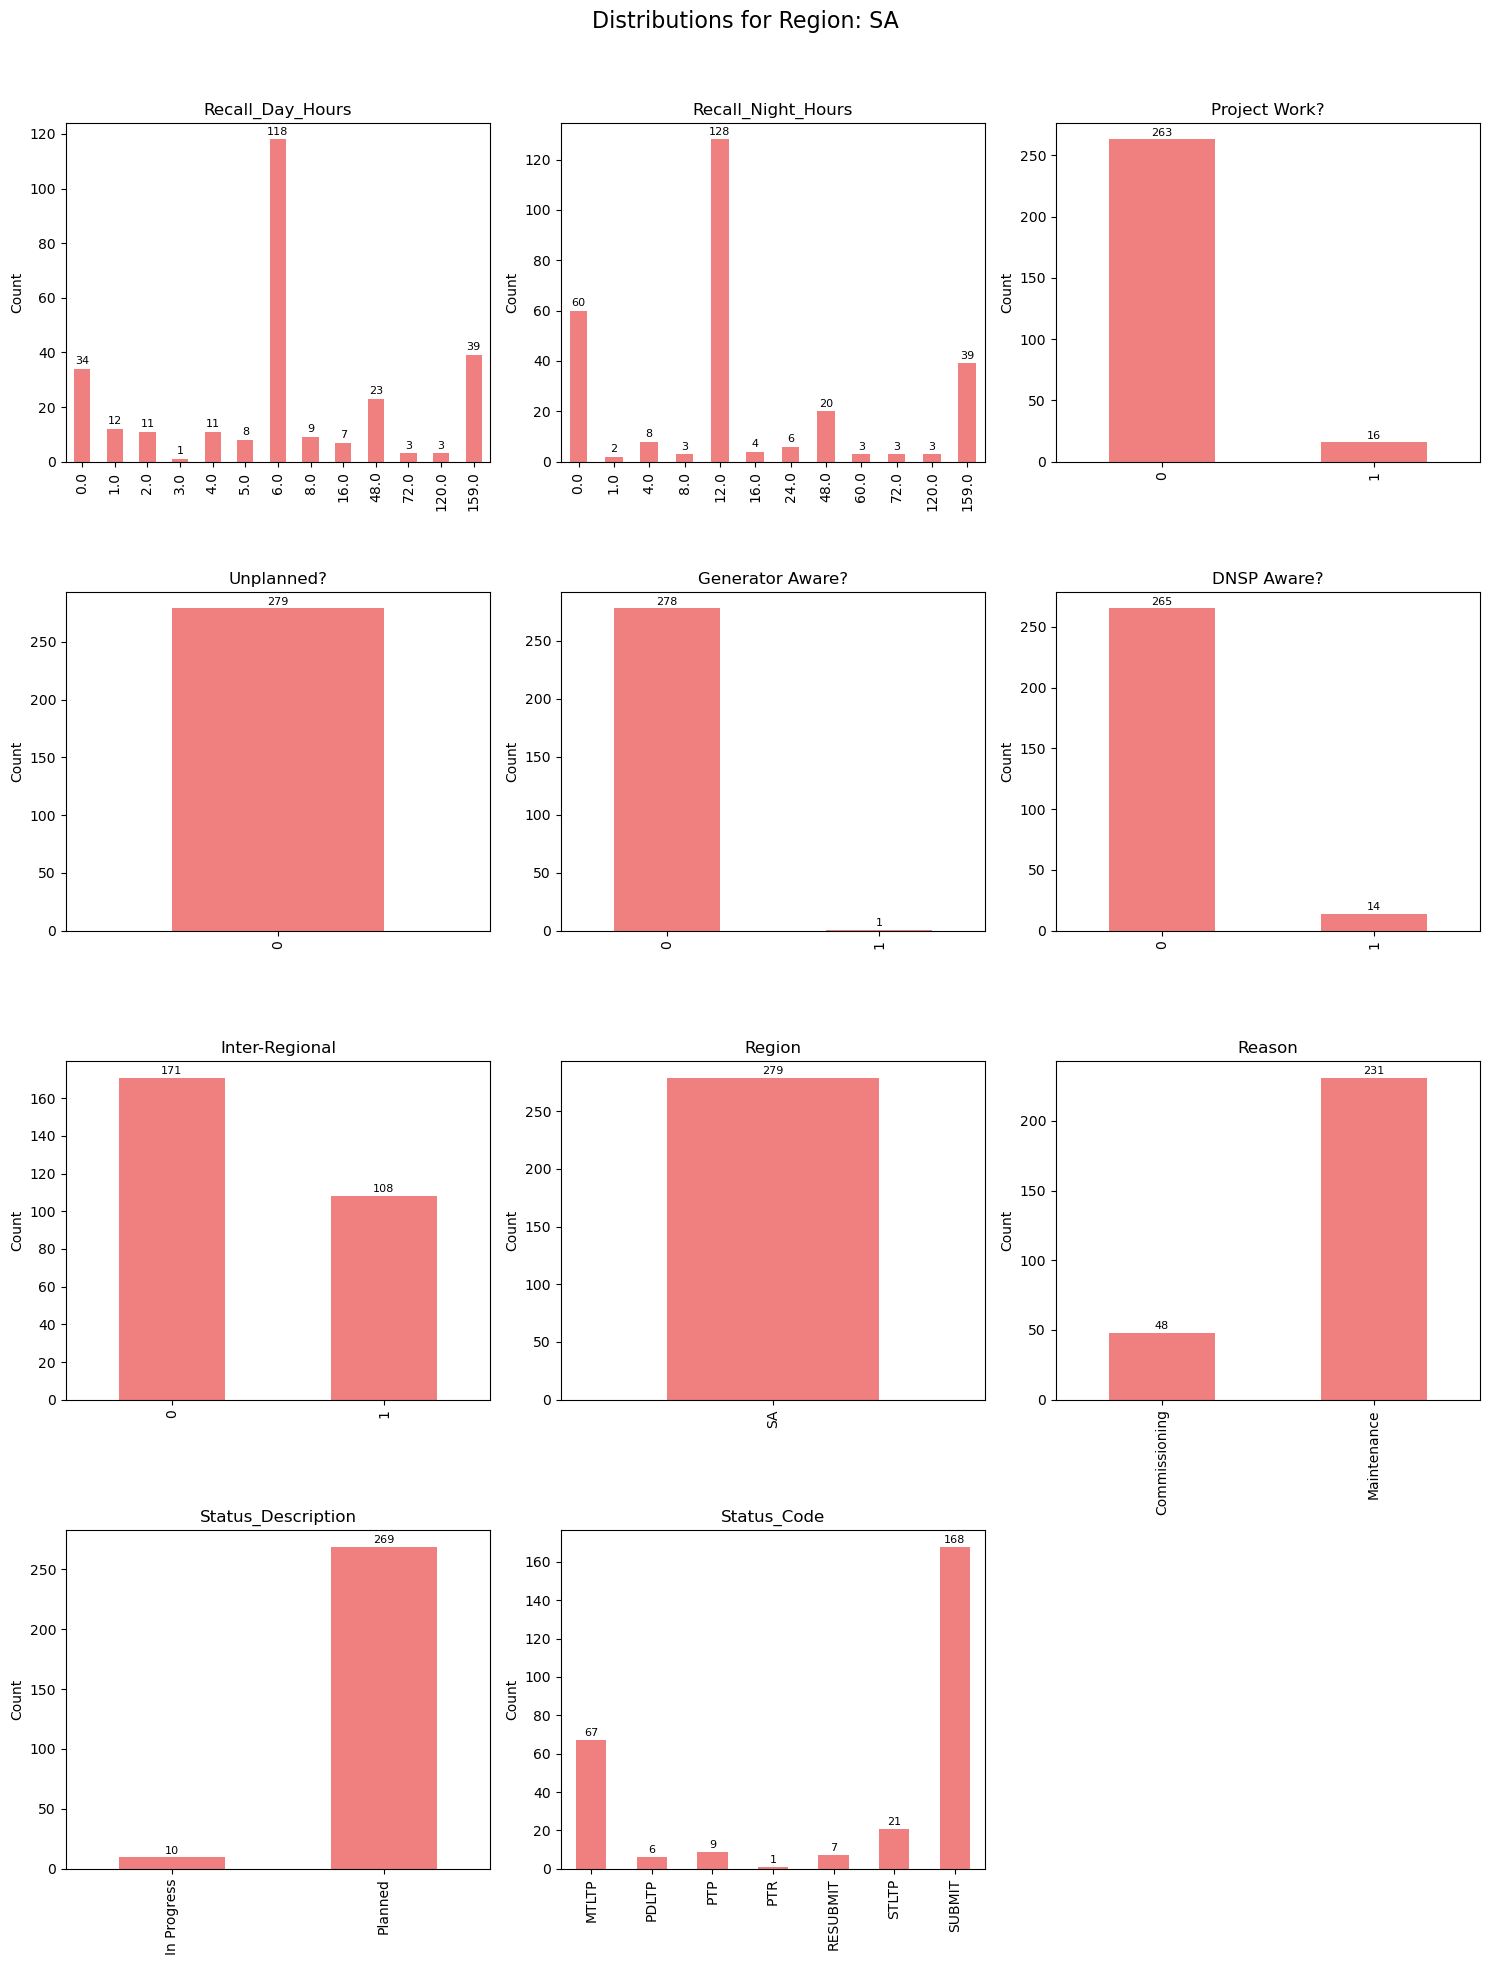

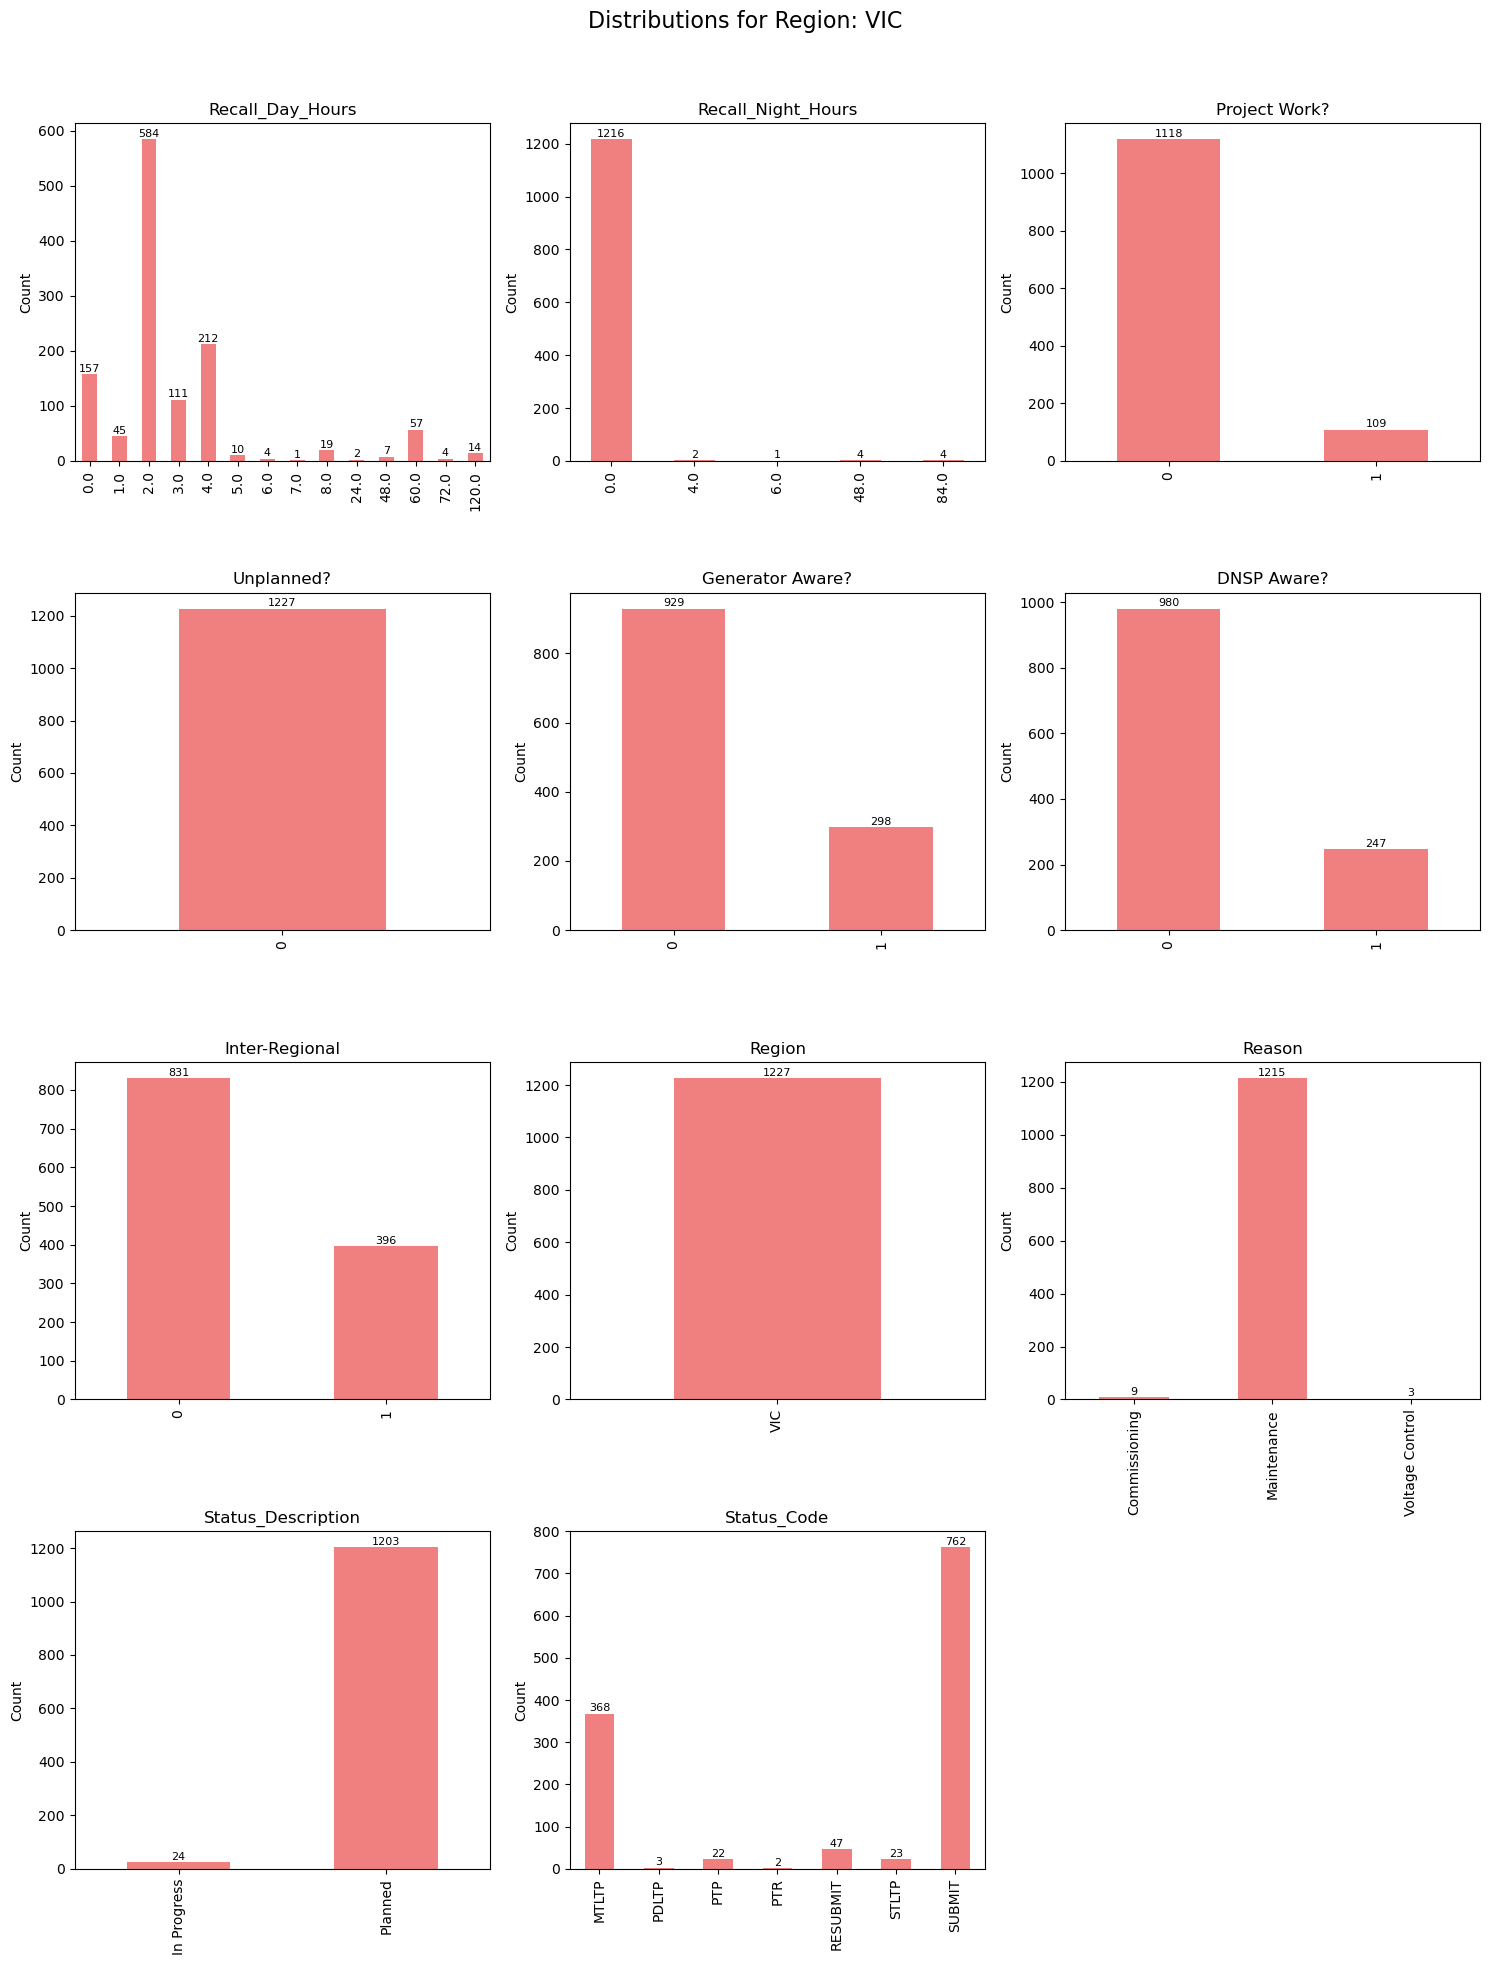

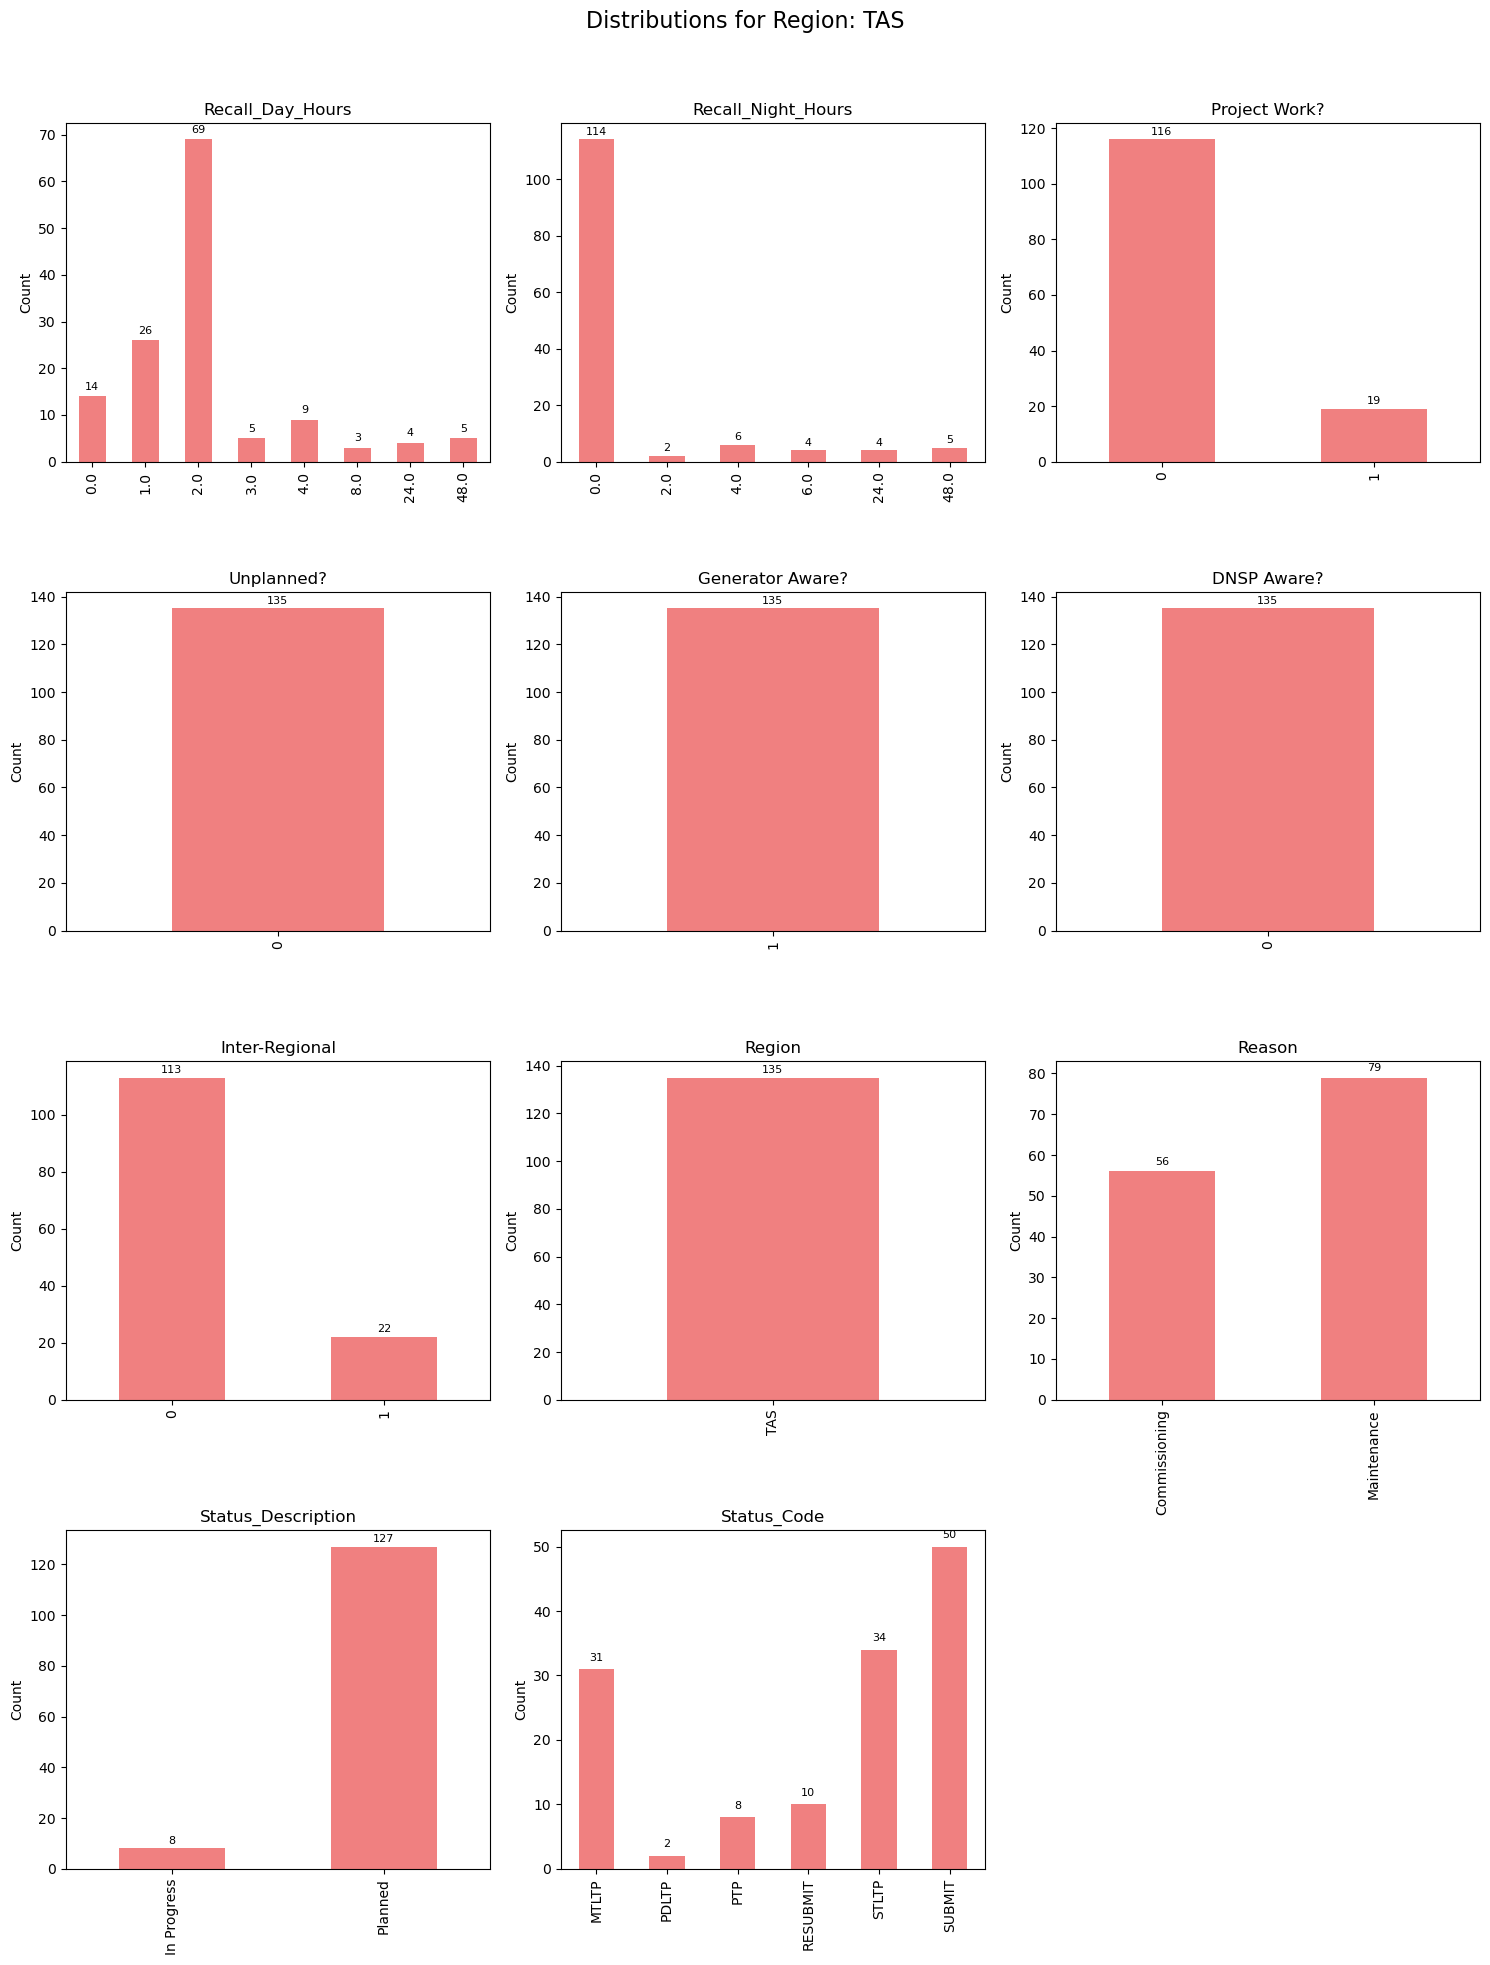

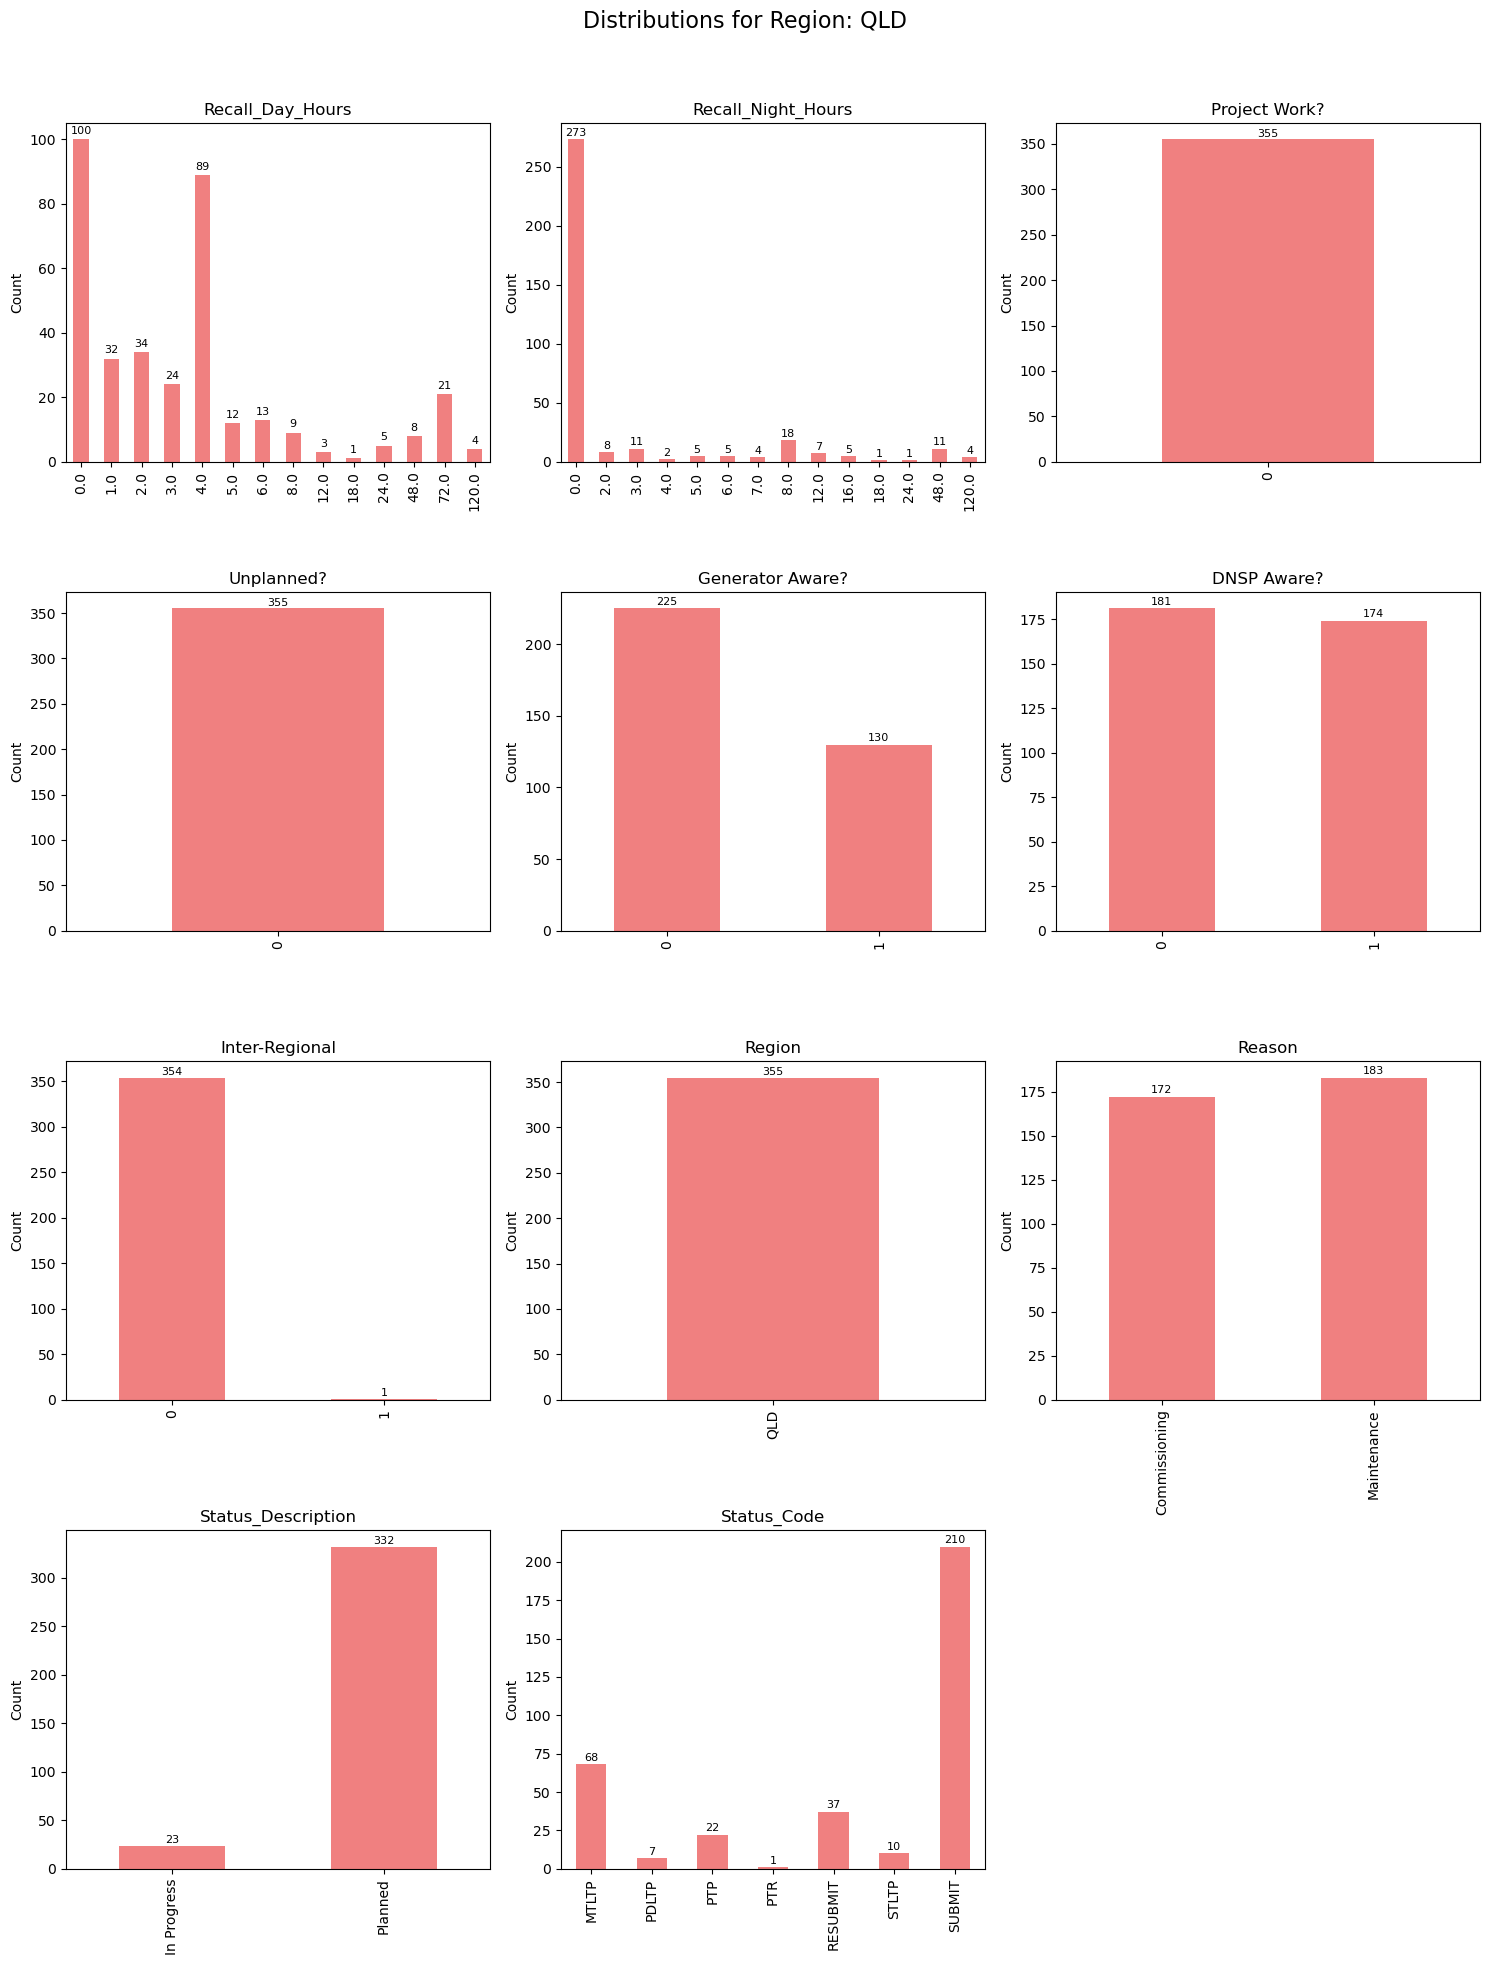

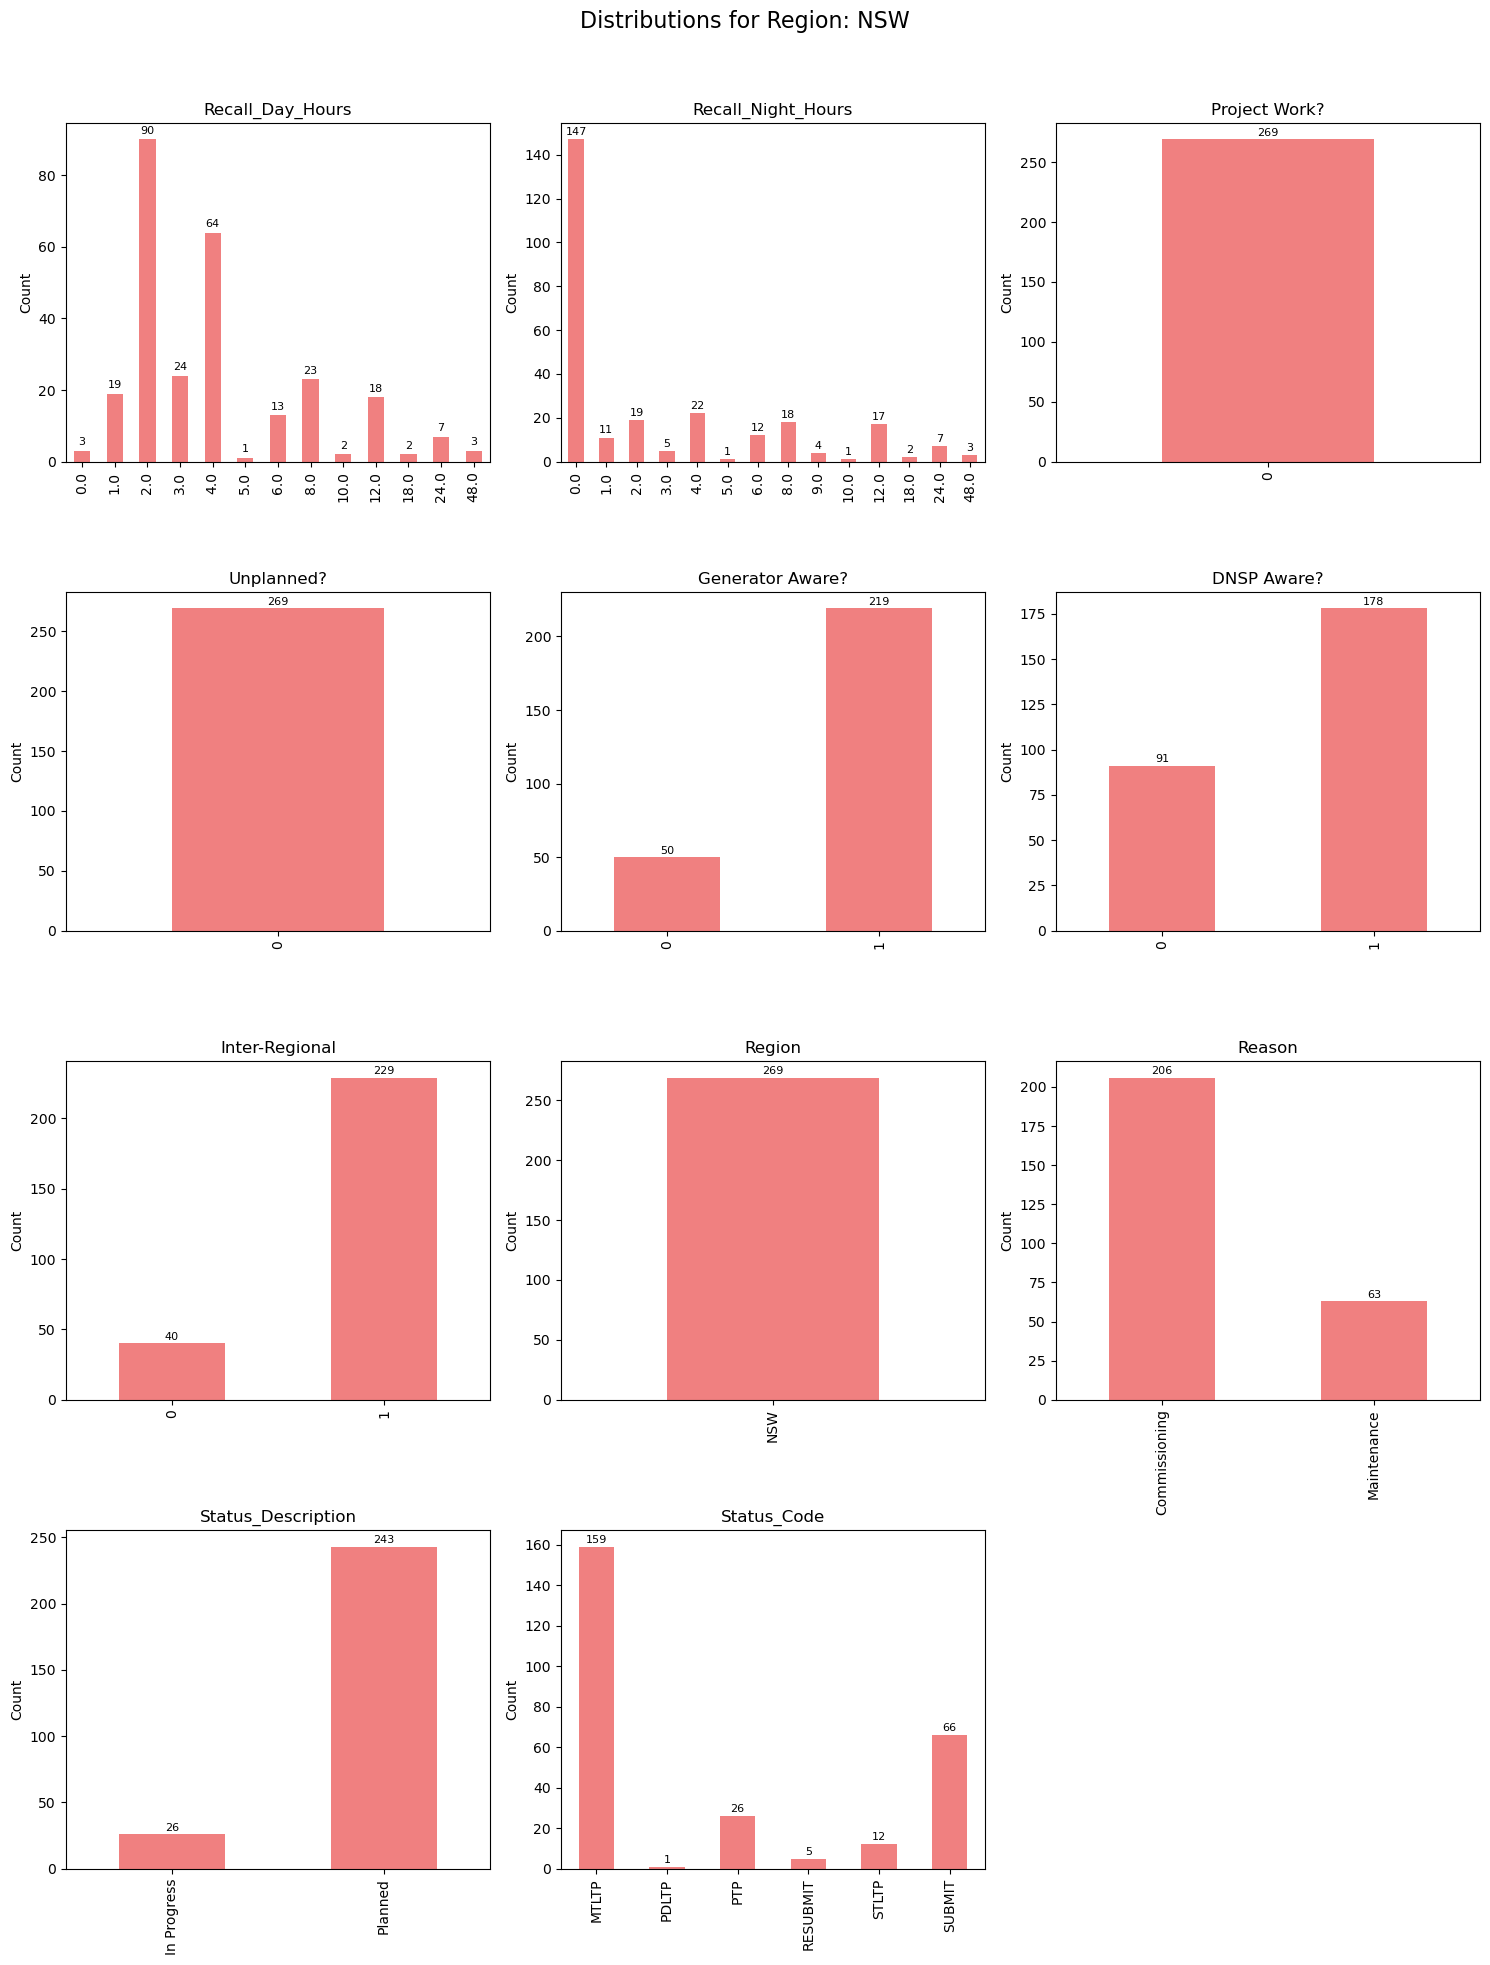

In [4]:
# visualisation for each region

regions = df['Region'].dropna().unique()
n_cols = 3

bool_cols = ['Project Work?', 'Unplanned?', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional']
numeric_cols = ['Recall_Day_Hours', 'Recall_Night_Hours']
categorical_cols = ['Region', 'Reason', 'Status_Description', 'Status_Code']

all_cols = numeric_cols + bool_cols + categorical_cols

for region in regions:
    region_df = df[df['Region'] == region]
    n_rows = (len(all_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = axes.flatten()
    fig.suptitle(f'Distributions for Region: {region}', fontsize=16)

    for idx, col in enumerate(all_cols):
        ax = axes[idx]
        counts = region_df[col].value_counts().sort_index()
        counts.plot(kind='bar', ax=ax, color='lightcoral')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')

        for i, value in enumerate(counts):
            ax.text(i, value + 1, str(int(value)), ha='center', va='bottom', fontsize=8)

    for j in range(len(all_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Perform regression for each state

In [6]:
from data.functions.regression_summary_and_plots import regression_summary_and_plots

In [7]:
# Loop through each unique region and assign a separate DataFrame
for region in df['Region'].unique():
    var_name = region.replace(" ", "_")  
    globals()[var_name] = df[df['Region'] == region].copy()


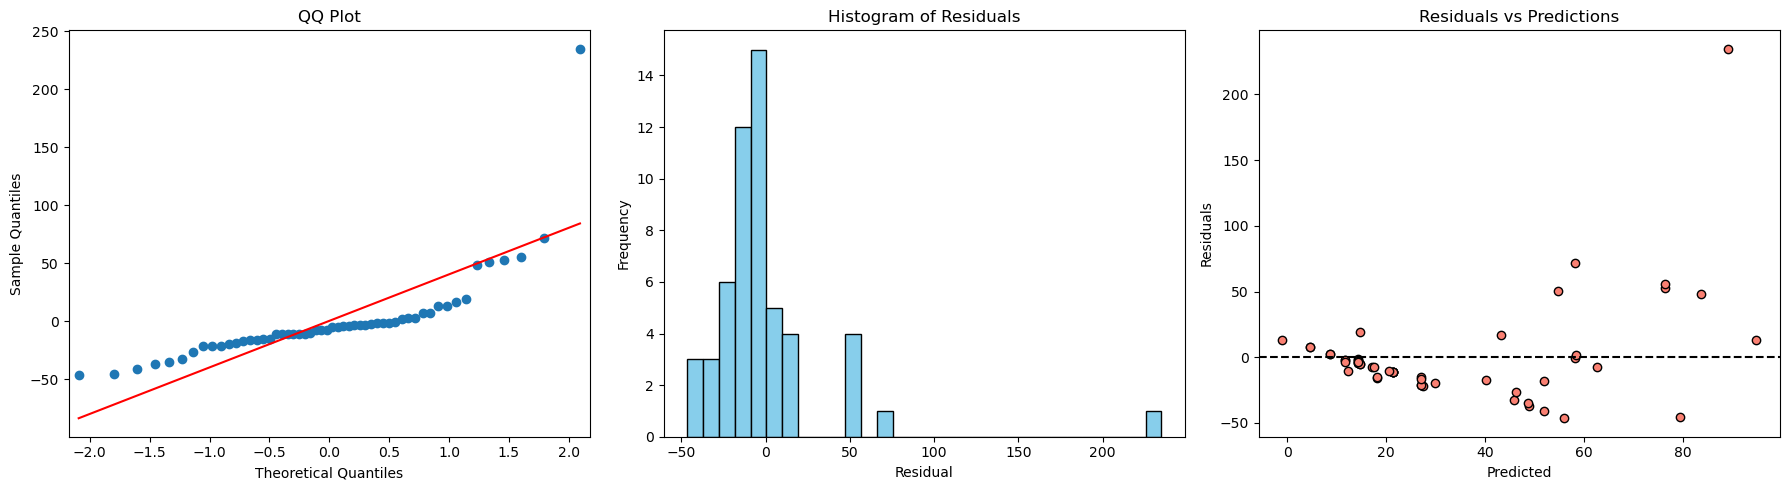

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     23.40
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           4.65e-21
Time:                        21:31:09   Log-Likelihood:                -1102.4
No. Observations:                 215   AIC:                             2219.
Df Residuals:                     208   BIC:                             2242.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9036      3.273     12.495      0.0

In [8]:
regression_summary_and_plots(NSW, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason'])

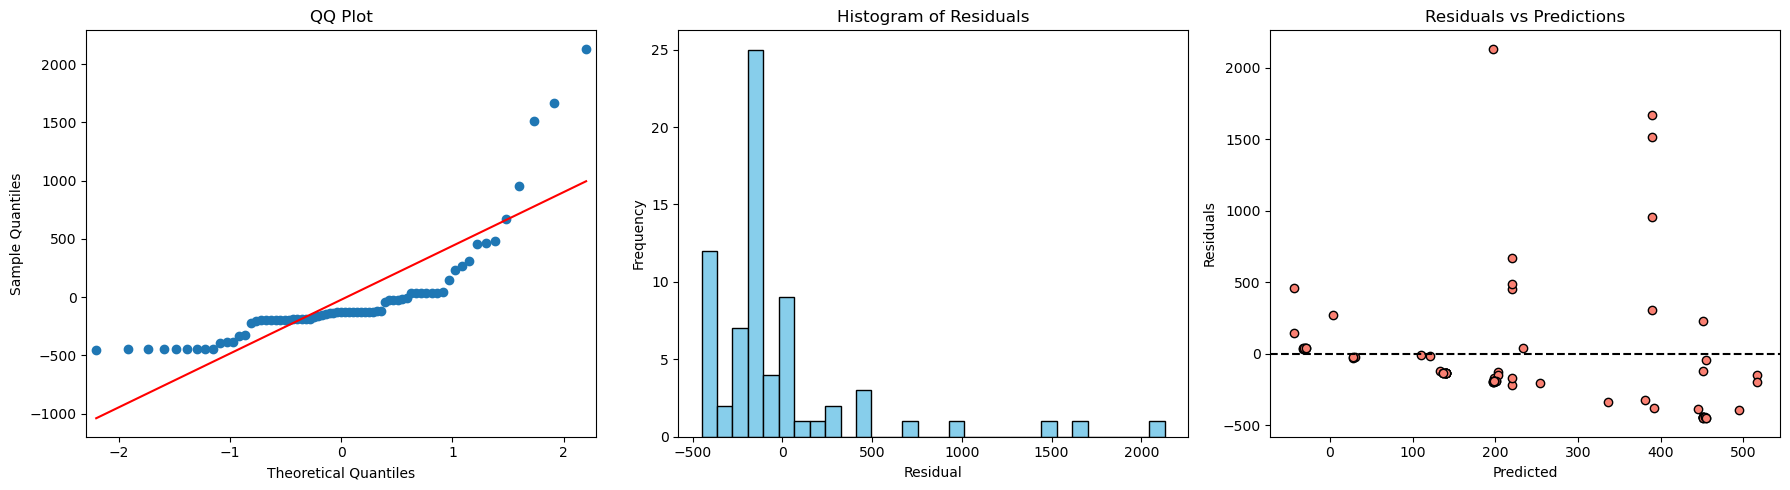

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     4.677
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           0.000407
Time:                        21:31:10   Log-Likelihood:                -2214.5
No. Observations:                 284   AIC:                             4441.
Df Residuals:                     278   BIC:                             4463.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.0876     51.456      6.920      0.0

In [9]:
regression_summary_and_plots(QLD, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Reason'])

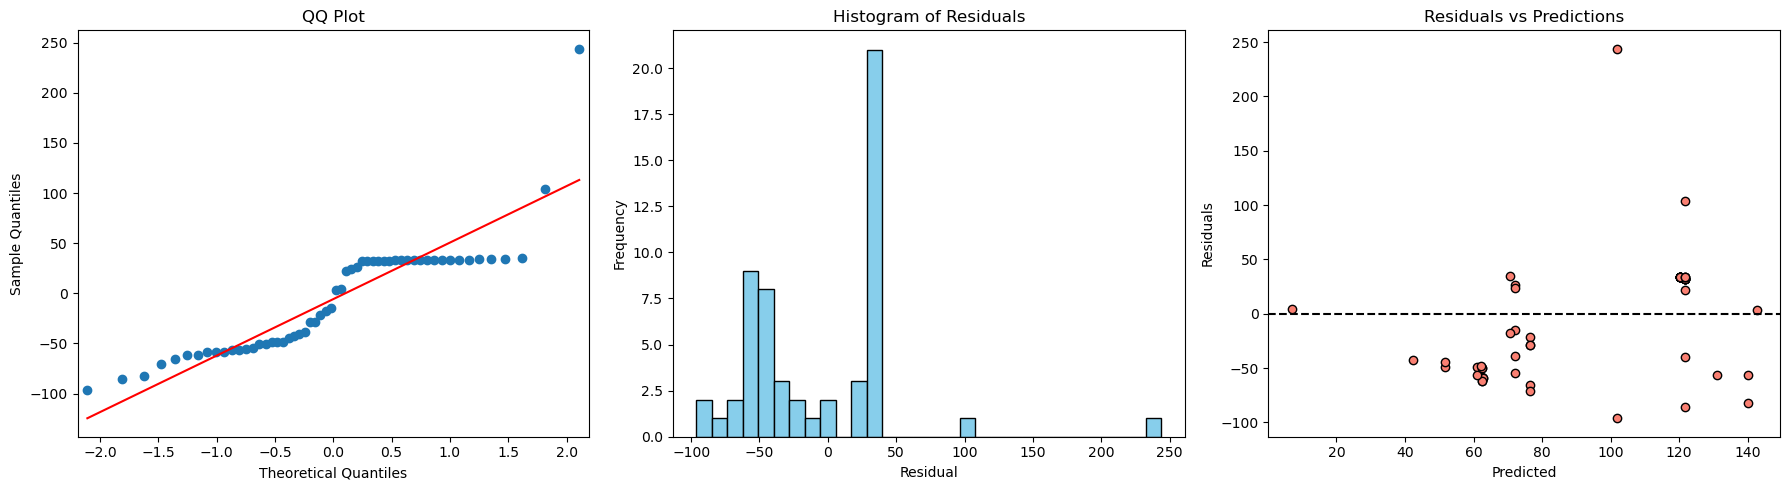

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     13.89
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           4.12e-10
Time:                        21:31:11   Log-Likelihood:                -1275.6
No. Observations:                 223   AIC:                             2561.
Df Residuals:                     218   BIC:                             2578.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3801     20.470      2.852      0.0

In [10]:
regression_summary_and_plots(SA, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Inter-Regional', 'Reason'])

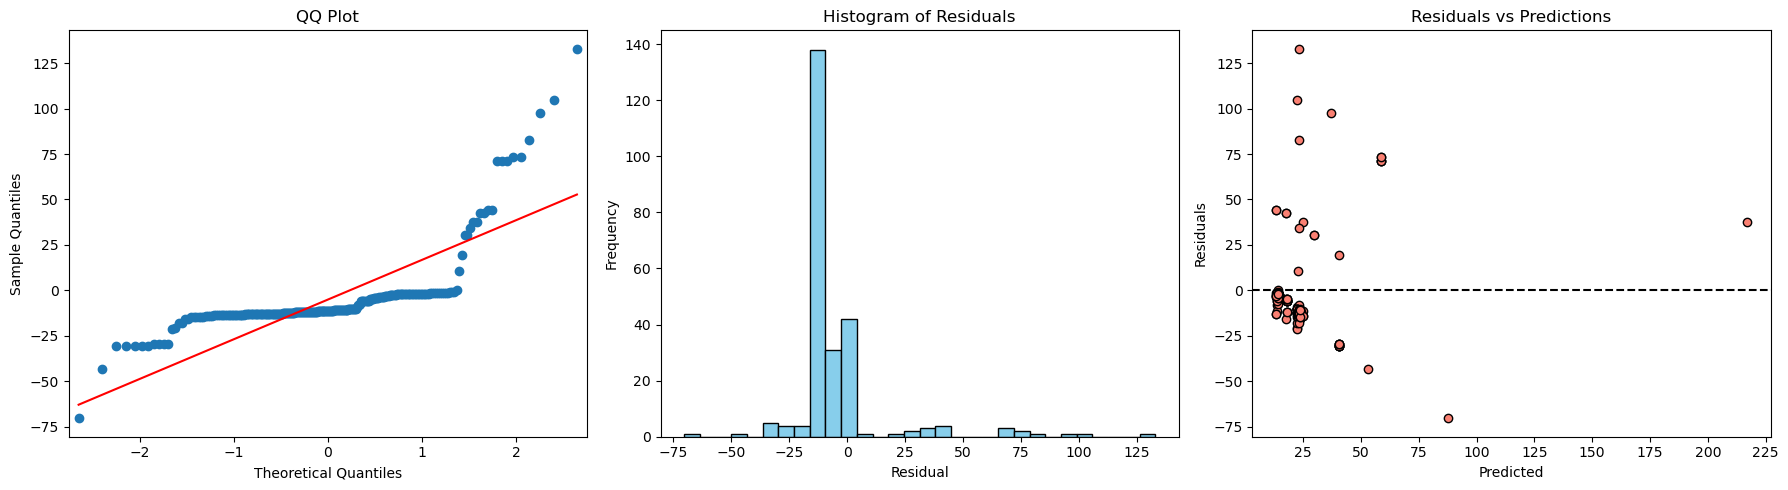

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     5.509
Date:                Fri, 06 Jun 2025   Prob (F-statistic):           3.14e-06
Time:                        21:31:12   Log-Likelihood:                -5631.6
No. Observations:                 981   AIC:                         1.128e+04
Df Residuals:                     973   BIC:                         1.132e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8957     26.764      1.976      0.0

In [11]:
regression_summary_and_plots(VIC, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Generator Aware?', 'DNSP Aware?', 'Inter-Regional', 'Reason'])

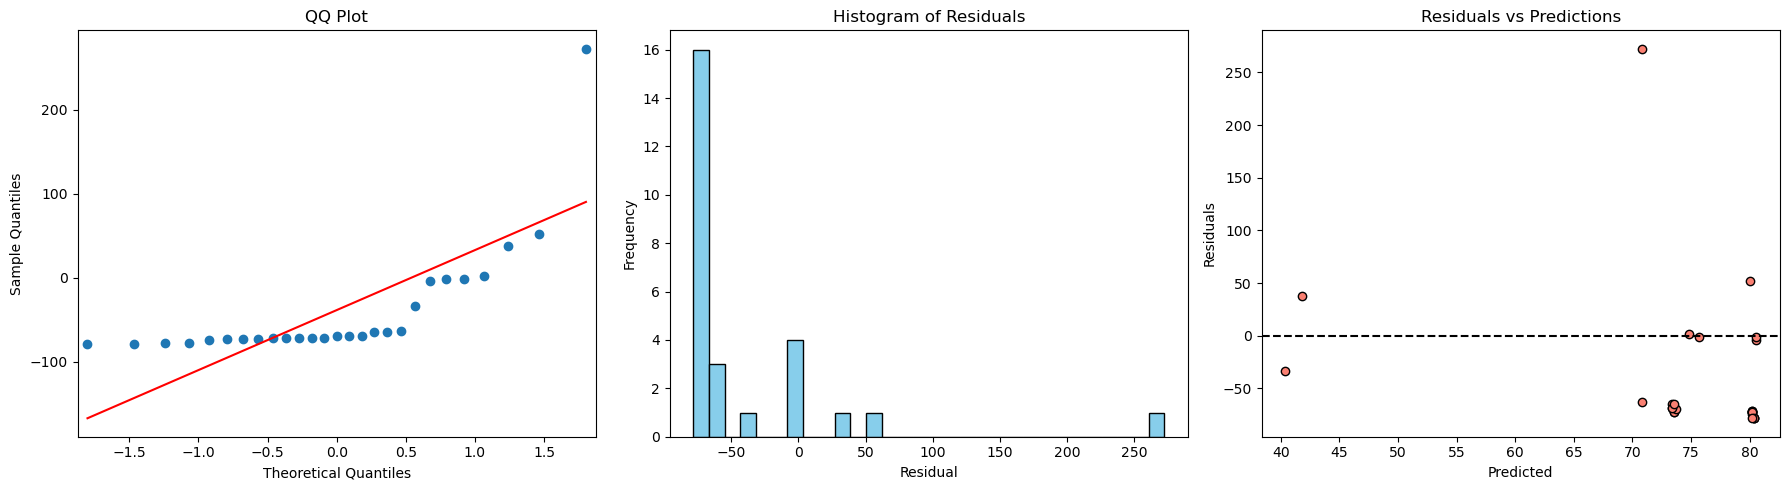

                            OLS Regression Results                            
Dep. Variable:         Duration_Hours   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                   0.04315
Date:                Fri, 06 Jun 2025   Prob (F-statistic):              0.999
Time:                        21:31:13   Log-Likelihood:                -758.60
No. Observations:                 108   AIC:                             1529.
Df Residuals:                     102   BIC:                             1545.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4162     46.622      1.489      0.1

In [12]:
regression_summary_and_plots(TAS, 
                             ['Recall_Day_Hours', 'Recall_Night_Hours', 'Project Work?', 'Inter-Regional', 'Reason'])